In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import lit
from pyspark.sql.types import StructField, StructType, StringType, IntegerType
from pyspark.sql.functions import *
from pyspark.sql.window import *
from pyspark.sql.functions import org.apache.spark.sql.functions.monotonically_increasing_id

In [ ]:
하둡에 올릴 폴더를 만들고 하둡에 올리자..

In [ ]:
hadoop fs -mkdir /user/root  
#하둡에   /user/root 디렉터리를 생성한다.

hadoop fs -put testlog /user/root/testlog  

# hadoop fs -put [로컬 디렉토리 파일 경로] [목적지]

# testlog라는 파일을 HDFS의 /user/root라는 HDFS 디렉터리에 업로드 한다

In [ ]:
hadoop fs -mkdir /data/data

In [ ]:
df1=spark.read.option("header", "true").csv("homework/project/기간코드.csv/part-00000-77ceccd2-876f-4748-bf97-ca46f5c4da32-c000.csv")
# home 안에 있음 최상위 data폴더 "data/project/기간코드.csv/part-00000-77ceccd2-876f-4748-bf97-ca46f5c4da32-c000.csv"

In [ ]:
추가적인 설명은 나중에
# file read / write

csv_file = spark.read.format("csv").option("header", "true").load("data/flights/csv/2010-summary.csv")
csv_file2 = spark.read.option("header", "true").csv("data/retails/2010-12-01.csv")

csv_file.write.format("csv").mode("overwrite").save("/abc/csv")
# mode : append, overwrite, error/errorifexists, ignore

csv_new = spark.read.format("csv").option("header", "true").csv("/tmp/csv/part-00000-*.csv")

json_file = spark.read.format("json").load("data/flights/json/2011-summary.json")
json_file.write.format("json").mode("overwrite").save("/tmp/json")

hdfs dfs -cat /tmp/json/*.json

# 그 외
# parquet : spark 컬럼 기반 데이터 저장 방식
# orc : hadoop 기반 데이터 저장 방식
# db : hive, oracle, mysql, mongodb, cassandra. hbase, ...
# text


In [ ]:
# Report.printSchema()

In [ ]:
df1=df.drop(*['세대', '인구4', '인구5','인구6','인구7','인구8','인구10','인구11','세대당인구','65세이상고령자'])

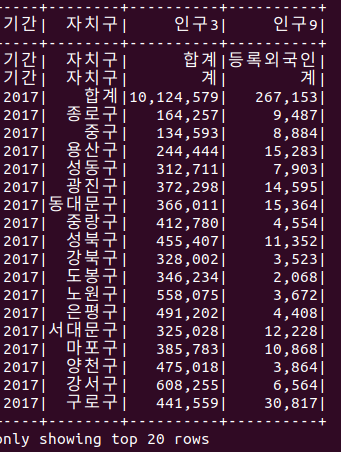


In [ ]:
df2=df1.filter(df1.기간 >= 0)
df2

In [ ]:
df3=df2.select(monotonically_increasing_id().alias("ID"),"*")

#id 칼럼을 만들고 1씩 차례로 증가.!!

In [ ]:

df4 = df3.select(col("기간").alias("기간"),col("자치구").alias("지역구"),col("인구3").alias("전체인구"), col("인구9").alias("등록외국인"))

In [ ]:
df4 = df3.select(regexp_replace(col('기간'), '2017', '17'),"*")

In [ ]:
df5=df4.withColumnRenamed("기간","기간코드").withColumnRenamed("지역구","지역코드")

In [ ]:
df5.replace(["2017","2018","2019"],["17","18","19"])
df5.show()

In [ ]:
#  스파크에서 하둡에 올리기!!
df5_final.coalesce(1).write.format("csv").option("header","true").mode("overwrite").save("/project/전처리1")

# 터미널에서 실행 하둡에서 우분투로 가져오기
hdfs dfs -get /project/전처리1/*.csv
# get: `part-00000-0954a43a-ec91-4119-af9b-2c46ce9c190f-c000.csv': File exists
# 우분투로 가져오면 요런 메세지가 뜸..

# 우분투에서 로컬피씨로 옮기는건 걍 이동시켜


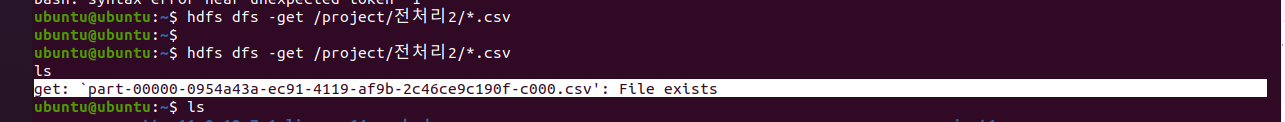

In [ ]:
----------------------------------------------------------------------------------------

In [ ]:
# 1단계
df6=spark.read.option("header", "true").csv("homework/남녀성비_시도_시_군_구.csv")

In [ ]:
df7=df6.drop(*["행정구역별(1)"])


In [ ]:

df8=df7.select(col("행정구역별(2)").alias("지역구"), col("20172").alias("2017년 남녀성비"),col("20173").alias("2017년 남자인구수"),col("20174").alias("2017년 여자인구수"), col("20185").alias("2018년 남녀성비"),col("20186").alias("2018년 남자인구수"),col("20187").alias("2018년 여자인구수"), col("20198").alias("2019년 남녀성비"),col("20199").alias("2019년 남자인구수"),col("201910").alias("2019년 여자인구수"))

In [ ]:
# df7=df6.filter(df6."2017년 남자인구수">= 0)
# df7=df6.filter(df6. 2017년 남자인구수>= 0)  # 둘다안됨
# df7=df6.filter(df6. '2017년 남녀성비' != 남녀성비<br>(A÷B×100))  

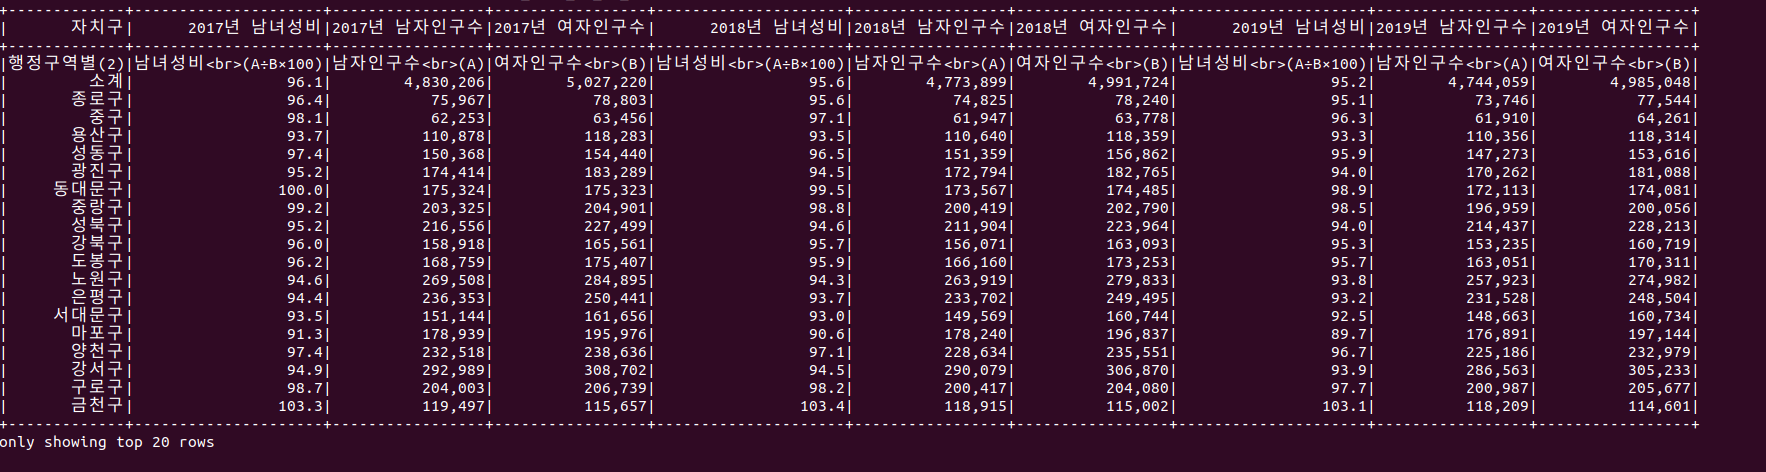

In [ ]:
df9 = df8.filter(col('지역구')!='행정구역별(2)')
df9.show()

In [ ]:
# 년도별로 분리한후 각 df에 년컬럼을 지역구 다음에 만든다.

In [ ]:

df9.createOrReplaceTempView("df9")

spark.sql("SELECT * FROM df7 LIMIT 5").show()

# 자료구조
spark.sql("DESCRIBE df9").show()


df2017_1 = df9.select("지역구","2017년 남녀성비","2017년 남자인구수","2017년 여자인구수")

df2017_1.show()

df2017_2= df2017_1.withColumn("기간",lit("2017"))  #2017이라는 동일한 값을 가지는 "기간"이라는 행을 새로 만듬

df2017_2.show()

df2017_3=df2017_2.select("기간","지역구","2017년 남녀성비","2017년 남자인구수","2017년 여자인구수")

df2017_4=df2017_3.select(regexp_replace(col('기간'), '2017', '17').alias('기간_ID'),col('지역구'),
                         col("2017년 남녀성비"),col("2017년 남자인구수"),col("2017년 여자인구수"))

df2017_4.show()


df2017_5=df2017_4.withColumnRenamed("지역구","지역코드")


df2017_5.show()

------------------------------------------------------------------------------------

df2018_1 = df9.select("지역구","2018년 남녀성비","2018년 남자인구수","2018년 여자인구수")

df2018_1.show()

df2018_2= df2018_1.withColumn("기간",lit("2018"))

df2018_2.show()

df2018_3=df2018_2.select("기간","지역구","2018년 남녀성비","2018년 남자인구수","2018년 여자인구수")

df2018_4=df2018_3.select(regexp_replace(col('기간'), '2018', '18').alias('기간_ID'),col('지역구'),
                         col("2018년 남녀성비"),col("2018년 남자인구수"),col("2018년 여자인구수"))

df2018_4.show()


df2018_5=df2018_4.withColumnRenamed("지역구","지역코드")


df2018_5.show()
-------------------------------------------------------------------------------

df2019_1 = df9.select("지역구","2019년 남녀성비","2019년 남자인구수","2019년 여자인구수")

df2019_1.show()

df2019_2= df2019_1.withColumn("기간",lit("2019"))

df2019_2.show()

df2019_3=df2019_2.select("기간","지역구","2019년 남녀성비","2019년 남자인구수","2019년 여자인구수")

df2019_4=df2019_3.select(regexp_replace(col('기간'), '2019', '19').alias('기간_ID'),col('지역구'),
                         col("2019년 남녀성비"),col("2019년 남자인구수"),col("2019년 여자인구수"))

df2019_4.show()


df2019_5=df2019_4.withColumnRenamed("지역구","지역코드")


df2019_5.show()

--------------------------------------------------------------------------------------
df2017_5.createOrReplaceTempView("df2017_5")
df2018_5.createOrReplaceTempView("df2018_5")
df2019_5.createOrReplaceTempView("df2019_5")


df_year=spark.sql("SELECT * FROM df2017_5 UNION ALL SELECT * FROM df2018_5 UNION ALL SELECT * FROM df2019_5")

df_year.show()
--------------------------------------------------------------------------------------

df_final=df_year.select(monotonically_increasing_id().alias("ID"),"*")
df_final.show()

df_final.coalesce(1).write.format("csv").option("header","true").mode("overwrite").save("/project/men_girl-result")


# 터미널에서 실행 하둡에서 우분투로 가져오기
hdfs dfs -get /homework/residence/*.csv

In [ ]:
-----------------------------------------------------------------------------------------------------

In [ ]:
-------------------------------------------------------------------------------------------------------

In [ ]:
hdfs dfs -put homework/victim.csv homework

In [ ]:
criminal=spark.read.option("header", "true").csv("homework/victim.csv")

In [ ]:
criminal_1=criminal.filter(criminal.시점 >= 0)

In [ ]:
criminal_2 =criminal_1.select(col("시점").alias("기간"), col("남자1").alias("남자범죄피해자수"), col("남자2").alias("남자강력범죄피해자수"), col("남자3").alias("남자절도범죄피해자수"),col("남자4").alias("남자폭력범죄피해자수"),col("여자5").alias("여자범죄피해자수"), col("여자6").alias("여자강력범죄피해자수"), col("여자7").alias("여자절도범죄피해자수"), col("여자8").alias("여자폭력범죄피해자수"), col("불상9").alias("불상범죄피해자수"), col("불상10").alias("불상강력범죄피해자수"), col("불상11").alias("불상절도범죄피해자수"), col("불상12").alias("불상폭력범죄피해자수"))

In [ ]:
criminal_3=criminal_2.withColumnRenamed("기간","기간코드")


In [ ]:
criminal_3.show()


In [ ]:
criminal_4=criminal_3.replace(["2017","2018","2019"],["17","18","19"],"기간코드")


In [ ]:
criminal_4.show()


In [ ]:
criminal_4 .coalesce(1).write.format("csv").option("header","true").mode("overwrite").save("/project/victim")

In [ ]:
hdfs dfs -get /project/victim/*.csv

In [ ]:
-----------------------------------------------------------------------------------------------------

In [ ]:
-------------------------------------------------------------------------------------------------------

In [ ]:
criminal_seoul1 = criminal_seoul.drop(criminal_seoul._c0)

criminal_seoul2=criminal_seoul1 .withColumnRenamed("자치구","지역구")

> columns_to_drop = ['합계.1','살인.1','강도.1','강간강제추행.1','절도.1','폭력.1']
>
> criminal_seoul3=criminal_seoul2.drop(*columns_to_drop)
>
> criminal_seoul3.show()

criminal_seoul4 = criminal_seoul3.filter(col('기간') != '기간')

criminal_seoul4.show()

criminal_seoul5 = criminal_seoul4.filter(col('지역구')!='합계')

criminal_seoul5.show()

criminal_seoul6=criminal_seoul5.orderBy(col("기간"), col("합계").desc())

criminal_seoul6.show()


In [ ]:
a1 = a.replace(["2017","2018","2109"],["17","18","19"],"기간")
a2 = a1.replace(["은평구","서대문구","마포구","양천구","강서구","구로구","금천구","영등포구","동작구","송파구","강동구","종로구","중구","용산구","성동구","광진구","동대문구","성북구","강북구","도봉구","관악구","서초구","강남구","중랑구","노원구"],["111181","111191","111201","111301","111212","111221","111281","111231","111241","111273","111274","111123","111121","111131","111142","111141","111152","111161","111291","111171","111251","111262","111261","111151","111311"],"지역구")

In [ ]:
old = no1.select(monotonically_increasing_id().alias("ID"),"*").withColumnRenamed("년도","기간")
